<a href="https://colab.research.google.com/github/gio-bis/MLPNS2021/blob/main/NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense#, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import glob
import pylab as pl
import numpy as np
from PIL import Image

(60000, 28, 28)

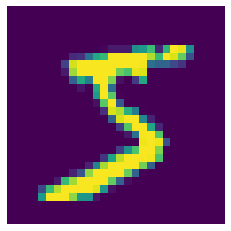

In [96]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()

img_rows, img_cols = 28, 28
pl.imshow(x_train[0])
pl.axis('off')
intialshape = x_train[0].shape
ndim = np.prod(x_train[0].shape)
x_train.shape

In [97]:
x_train.dtype, x_train.max(), x_train.min()

(dtype('uint8'), 255, 0)

In [98]:
#divido per 255 per normalizzare
x_train = (x_train.astype(float) / 255).reshape(len(x_train), ndim)
x_test = (x_test.astype(float) / 255).reshape(len(x_test), ndim)
x_train.shape, x_test.shape   

((60000, 784), (10000, 784))

In [99]:
model_digits64 = Sequential()
## encoder
# input layer and the output size
model_digits64.add(Dense(units = 128, activation = 'linear',input_shape=(784,)))
  #compression layer
model_digits64.add(Dense(units = 64, activation = 'linear'))
## deencoder
#decompression layer, same size as in the encoder
model_digits64.add(Dense(units = 128, activation = 'linear'))
#output layer, same size as input
model_digits64.add(Dense(ndim, activation='linear'))



In [100]:
model_digits64.compile(optimizer='SGD', loss ='mean_squared_error')

In [101]:
model_digits64.compile(optimizer = keras.optimizers.Adam(lr=0.001), loss = 'mean_squared_error')

In [102]:
print(model_digits64.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_34 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_35 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_36 (Dense)             (None, 784)               101136    
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________
None


In [103]:
history64 = model_digits64.fit(x_train, x_train, 
                               validation_data=(x_test, x_test),
                               epochs=60, batch_size=100, verbose=1)

Epoch 1/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0374 - val_loss: 0.0108
Epoch 2/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0105 - val_loss: 0.0095
Epoch 3/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0097 - val_loss: 0.0093
Epoch 4/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0096 - val_loss: 0.0093
Epoch 5/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 6/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 7/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 8/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 9/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0092
Epoch 10/60
600/600 [==============================] - 2s 3ms/step - loss: 0.0095 - val_loss: 0.0092

Text(0.5, 0, 'iteration')

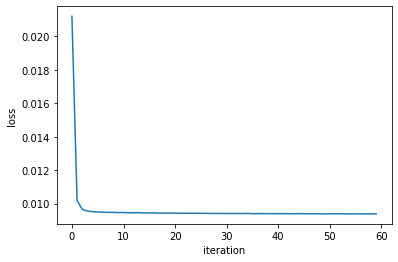

In [104]:
pl.plot(np.array(history64.history['loss']))
pl.ylabel('loss')
pl.xlabel('iteration')
#pl.yscale('log')
#pl.xscale('log')

In [105]:
output_image64 = model_digits64.predict(x_test)

In [106]:
def compareinout(i, outim, testimg, initialshape=(28,28)):
  fig = pl.figure(figsize=(10,5))
  ax = fig.add_subplot(121) 
  ax.imshow(testimg[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ax = fig.add_subplot(122) 
  ax.imshow(outim[i].reshape(initialshape) , cmap="bone")
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

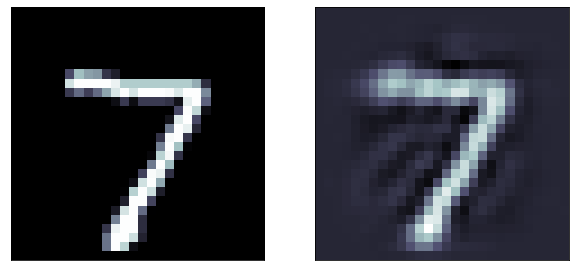

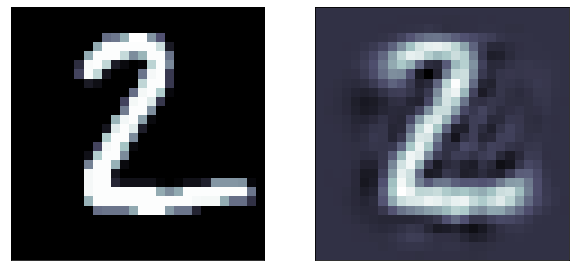

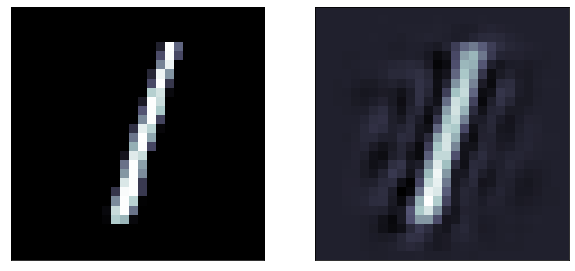

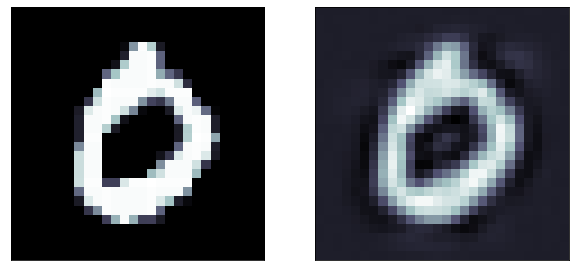

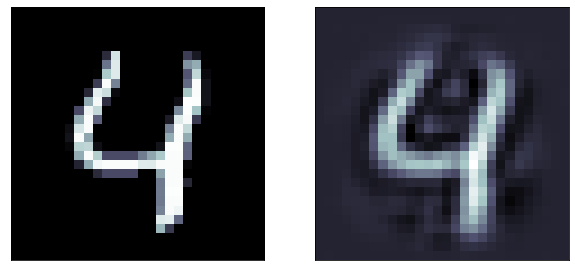

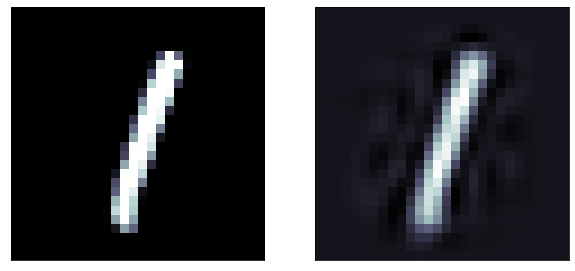

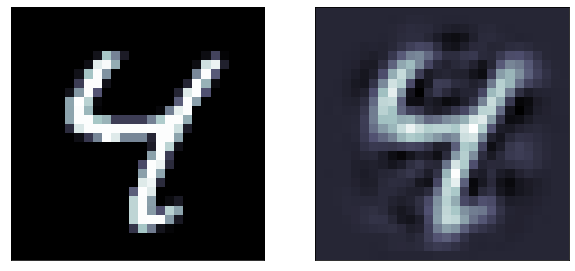

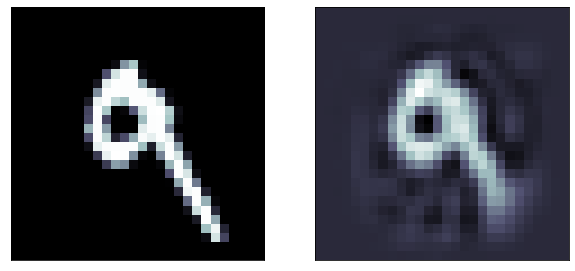

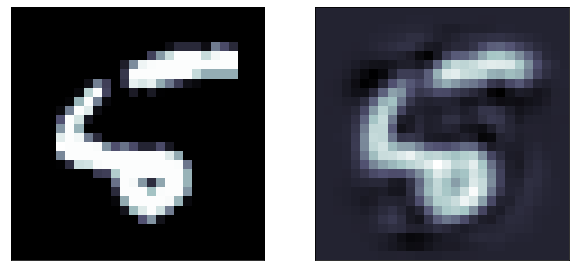

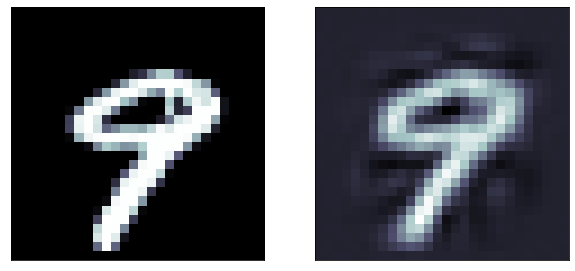

In [107]:
for i in range(10):
  compareinout(i, output_image64, x_test)